In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns

In [2]:
groceries = pd.read_csv("C:/Users/H P/Desktop/ANACONDA/ASSOCIATION/ASSIGNMENT/groceries.csv",sep=';')
groceries 

,"citrus fruit,semi-finished bread,margarine,ready soups"
0,"tropical fruit,yogurt,coffee"
1,whole milk
2,"pip fruit,yogurt,cream cheese ,meat spreads"
3,"other vegetables,whole milk,condensed milk,lon..."
4,"whole milk,butter,yogurt,rice,abrasive cleaner"
...,...
9829,"sausage,chicken,beef,hamburger meat,citrus fru..."
9830,cooking chocolate
9831,"chicken,citrus fruit,other vegetables,butter,y..."
9832,"semi-finished bread,bottled water,soda,bottled..."


In [3]:
groceries = groceries.replace(np.nan, '', regex=True)
groceries 

,"citrus fruit,semi-finished bread,margarine,ready soups"
0,"tropical fruit,yogurt,coffee"
1,whole milk
2,"pip fruit,yogurt,cream cheese ,meat spreads"
3,"other vegetables,whole milk,condensed milk,lon..."
4,"whole milk,butter,yogurt,rice,abrasive cleaner"
...,...
9829,"sausage,chicken,beef,hamburger meat,citrus fru..."
9830,cooking chocolate
9831,"chicken,citrus fruit,other vegetables,butter,y..."
9832,"semi-finished bread,bottled water,soda,bottled..."


In [4]:
groceries
transactions = []
for i in range(0, 9834 ):
    transactions.append([str(groceries.values[i,u]) for u in range(1)]) 

In [5]:
groceries_series  = pd.DataFrame(pd.Series(transactions))
groceries_series 
groceries_series.columns = ["business"]
groceries_series

,business
0,"[tropical fruit,yogurt,coffee]"
1,[whole milk]
2,"[pip fruit,yogurt,cream cheese ,meat spreads]"
3,"[other vegetables,whole milk,condensed milk,lo..."
4,"[whole milk,butter,yogurt,rice,abrasive cleaner]"
...,...
9829,"[sausage,chicken,beef,hamburger meat,citrus fr..."
9830,[cooking chocolate]
9831,"[chicken,citrus fruit,other vegetables,butter,..."
9832,"[semi-finished bread,bottled water,soda,bottle..."


In [6]:
X = groceries_series['business'].str.join(sep=',').str.get_dummies(sep=',')
X

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets = apriori(X, min_support=0.005, max_len=3,use_colnames = True)
frequent_itemsets 

,support,itemsets
0,0.008033,(Instant food products)
1,0.033455,(UHT-milk)
2,0.017694,(baking powder)
3,0.052471,(beef)
4,0.033252,(berries)
...,...,...
984,0.010474,"(whole milk, soda, yogurt)"
985,0.007932,"(whole milk, whipped/sour cream, tropical fruit)"
986,0.006203,"(whipped/sour cream, tropical fruit, yogurt)"
987,0.015152,"(whole milk, tropical fruit, yogurt)"


In [8]:
frequent_itemsets.sort_values('support',ascending = False,inplace=True)
frequent_itemsets.sort_values

<bound method DataFrame.sort_values of       support                                  itemsets
117  0.255542                              (whole milk)
73   0.193512                        (other vegetables)
88   0.183954                              (rolls/buns)
98   0.174395                                    (soda)
118  0.139516                                  (yogurt)
..        ...                                       ...
874  0.005084  (newspapers, whole milk, tropical fruit)
276  0.005084                 (chewing gum, whole milk)
332  0.005084                     (coffee, frankfurter)
346  0.005084                     (cream cheese , curd)
271  0.005084           (canned fish, other vegetables)

[989 rows x 2 columns]>

In [9]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2557,(ham),(white bread),0.026032,0.042099,0.005084,0.195312,4.639380,0.003988,1.190401
2556,(white bread),(ham),0.042099,0.026032,0.005084,0.120773,4.639380,0.003988,1.107755
2018,"(other vegetables, butter)",(whipped/sour cream),0.020033,0.071690,0.005796,0.289340,4.035987,0.004360,1.306265
2023,(whipped/sour cream),"(other vegetables, butter)",0.071690,0.020033,0.005796,0.080851,4.035987,0.004360,1.066168
1312,(root vegetables),(herbs),0.109010,0.016270,0.007016,0.064366,3.956075,0.005243,1.051404
1313,(herbs),(root vegetables),0.016270,0.109010,0.007016,0.431250,3.956075,0.005243,1.566577
2040,"(root vegetables, other vegetables)",(onions),0.047387,0.031015,0.005695,0.120172,3.874650,0.004225,1.101334
2045,(onions),"(root vegetables, other vegetables)",0.031015,0.047387,0.005695,0.183607,3.874650,0.004225,1.166856
2204,(tropical fruit),"(citrus fruit, pip fruit)",0.104942,0.013830,0.005593,0.053295,3.853668,0.004142,1.041687
2201,"(citrus fruit, pip fruit)",(tropical fruit),0.013830,0.104942,0.005593,0.404412,3.853668,0.004142,1.502813


C:\Users\H P\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


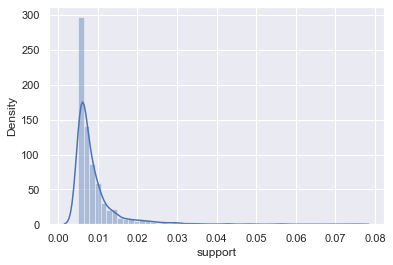

In [10]:
sns.set_theme(); np.random.seed(0)
x = rules.support
ax = sns.distplot(x)

In [11]:
book = pd.read_csv("C:/Users/H P/Desktop/ANACONDA/ASSOCIATION/ASSIGNMENT/book.csv")
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [15]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets = apriori(book, min_support=0.005, max_len=3,use_colnames = True)
frequent_itemsets 

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
219,0.0130,"(ItalCook, GeogBks, Florence)"
220,0.0115,"(ItalArt, GeogBks, ItalAtlas)"
221,0.0090,"(ItalArt, GeogBks, Florence)"
222,0.0125,"(ItalCook, ItalArt, ItalAtlas)"


In [16]:
frequent_itemsets.sort_values('support',ascending = False,inplace=True)
frequent_itemsets.sort_values

<bound method DataFrame.sort_values of      support                         itemsets
2     0.4310                        (CookBks)
0     0.4230                       (ChildBks)
3     0.2820                       (DoItYBks)
6     0.2760                        (GeogBks)
12    0.2560              (ChildBks, CookBks)
..       ...                              ...
206   0.0065    (RefBks, ItalAtlas, Florence)
64    0.0065            (ItalAtlas, Florence)
207   0.0055      (ItalArt, RefBks, Florence)
109   0.0055  (ChildBks, ItalAtlas, Florence)
145   0.0055    (ItalArt, Florence, YouthBks)

[224 rows x 2 columns]>

In [17]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
748,"(ItalArt, RefBks)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
753,(ItalAtlas),"(ItalArt, RefBks)",0.0370,0.0200,0.0165,0.445946,22.297297,0.015760,1.768780
743,"(ArtBks, ItalAtlas)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
746,(ItalArt),"(ArtBks, ItalAtlas)",0.0485,0.0180,0.0165,0.340206,18.900344,0.015627,1.488344
351,"(ItalCook, ArtBks)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
354,(ItalArt),"(ItalCook, ArtBks)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
565,(ItalAtlas),"(ItalCook, RefBks)",0.0370,0.0465,0.0230,0.621622,13.368207,0.021279,2.519964
560,"(ItalCook, RefBks)",(ItalAtlas),0.0465,0.0370,0.0230,0.494624,13.368207,0.021279,1.905511
922,"(GeogBks, ItalAtlas)",(ItalArt),0.0205,0.0485,0.0115,0.560976,11.566507,0.010506,2.167306
923,(ItalArt),"(GeogBks, ItalAtlas)",0.0485,0.0205,0.0115,0.237113,11.566507,0.010506,1.283939


C:\Users\H P\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


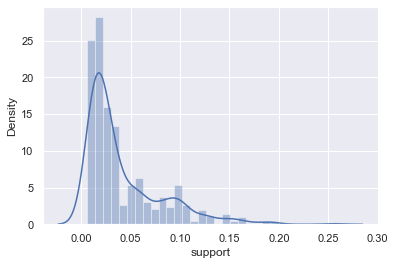

In [18]:
sns.set_theme(); np.random.seed(0)
x = rules.support
ax = sns.distplot(x)